# FIR LAB

https://klyshko.github.io/teaching/2019-02-22-teaching

import Libs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import scipy

Import Wav File and Show

C:\Users\vicoj\AppData\Local\Temp\ipykernel_424\235206495.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate , data = wavfile.read(file_path)


number of channels = 2
length = 9.258004535147393s
dtypr = int16


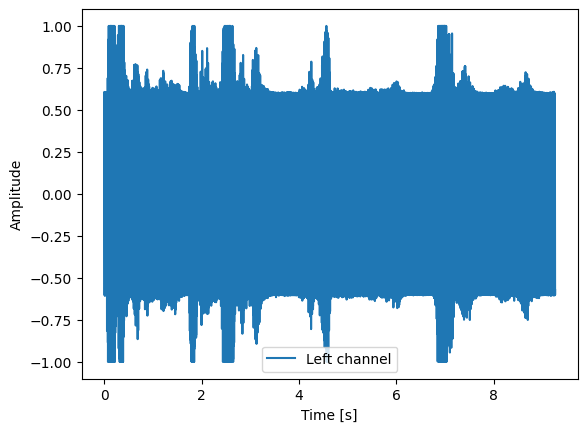

In [6]:
# Specify the path to your WAV file
file_path = 'speech_three-tones.wav'

# Read the WAV file
samplerate , data = wavfile.read(file_path)
length = data.shape[0] / samplerate


print(f"number of channels = {data.shape[1]}")
print(f"length = {length}s")
print(f"dtypr = {data.dtype}")

data_l = data[:, 0]
data_r = data[:, 1]

time = np.linspace(0., length, data.shape[0])
plt.plot(time,data_l/((2**16)/2), label="Left channel")
#plt.plot(time, data_r , label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

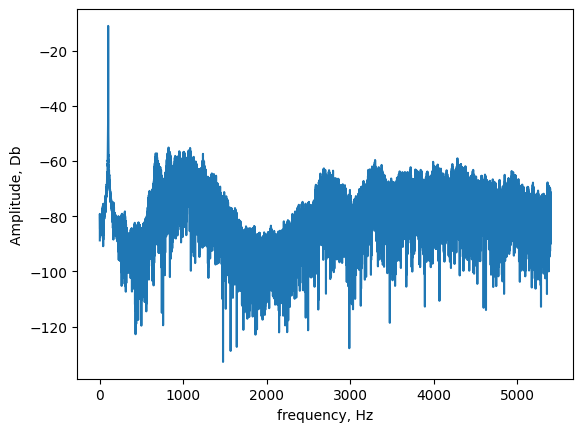

In [8]:
# computes the one-dimensional discrete Fourier transform (DFT)
fft_spectrum = np.fft.rfft(data_l)/((2**16)/2)
fft_spectrum_abs = np.abs(fft_spectrum)/data_l.size

freq = np.fft.rfftfreq(data_l.size, d=1./samplerate)

plt.plot(freq[0:50000], 20*np.log10(fft_spectrum_abs[0:50000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, Db")
plt.show()

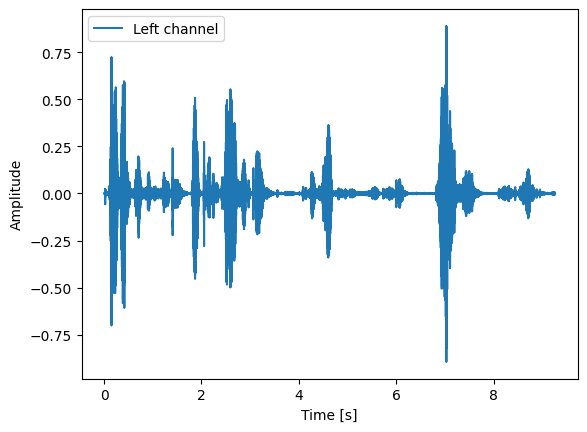

In [11]:
from scipy.signal import kaiserord, lfilter, firwin, freqz

f1, f2 = 300, 2000
taps_BP = firwin(2001, [f1, f2],width=200, pass_zero=False,fs=samplerate)
#taps_SP = firwin(2001, [90, 110],pass_zero=True , fs=samplerate)

# Use lfilter to filter x with the FIR filter.
filtered_FIR_BP_SP = lfilter(taps_BP, 1.0, data_l)

wavfile.write('filtered_FIR.wav', samplerate, filtered_FIR_BP_SP.astype(np.int16))

plt.plot(time, filtered_FIR_BP_SP/((2**16)/2), label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()



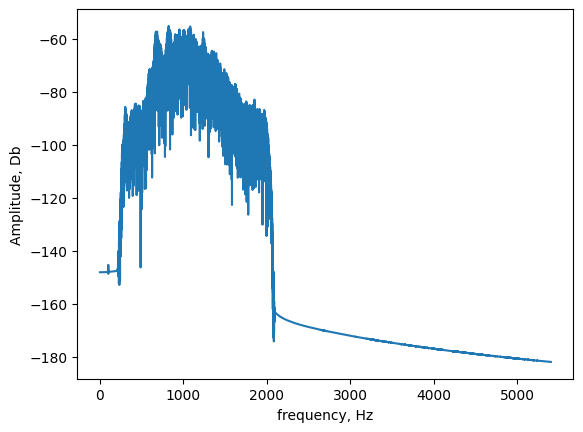

In [12]:
fft_spectrum = np.fft.rfft(filtered_FIR_BP_SP)/((2**16)/2)
freq = np.fft.rfftfreq(filtered_FIR_BP_SP.size, d=1./samplerate)
fft_spectrum_abs = np.abs(fft_spectrum)/filtered_FIR_BP_SP.size

plt.plot(freq[0:50000],20*np.log10(fft_spectrum_abs[0:50000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, Db")
plt.show()

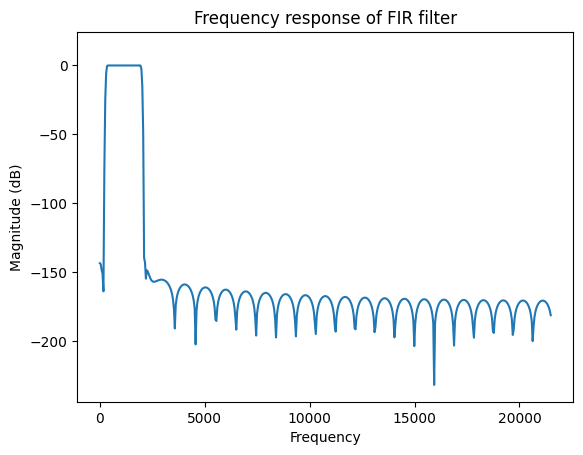

In [13]:
from scipy.signal import kaiserord, lfilter, firwin, freqz

w, h = freqz(taps_BP, 1,fs=samplerate)

plt.plot(w[0:500], 20*np.log10(np.abs(h))[0:500])
plt.bar(100, 12, width=0.5, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency response of FIR filter')
plt.show()